In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Quality Check

#### Check for missing values, outliers or incorrect entries, columns like (GHI, DNI, DHI) and check for outliers in columns like (ModA, ModB, WS, WSgust)

In [2]:
def clean_data(df):
    data = df
    data = data.replace([np.inf, -np.inf], np.nan)
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

    numeric_columns = data.select_dtypes(include=[np.number]).columns
    data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))

    data.drop_duplicates(inplace=True)

    null_columns = data.columns[data.isnull().sum() == len(data)]
    data.drop(columns=null_columns, inplace=True)

    return data

In [3]:
def eda(df):
    df = clean_data(df)
    
    # Convert the time column to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Plot time series for GHI, DNI, DHI, and Tamb
    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df['GHI'], label='GHI')
    plt.plot(df['Timestamp'], df['DNI'], label='DNI')
    plt.plot(df['Timestamp'], df['DHI'], label='DHI')
    plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
    plt.legend()
    plt.title('Time Series of GHI, DNI, DHI, and Tamb')
    plt.show()
    
    # Correlation heatmap
    correlation = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
    
    # Scatter plot of RH vs Temperature and GHI
    plt.figure(figsize=(12, 6))
    plt.scatter(df['RH'], df['Tamb'], alpha=0.6, label='Temperature vs RH')
    plt.scatter(df['RH'], df['GHI'], alpha=0.6, label='GHI vs RH')
    plt.legend()
    plt.title('Impact of Relative Humidity on Temperature and Solar Radiation')
    plt.show()
    
    # Histograms of key variables
    df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=30, figsize=(12, 8))
    plt.suptitle('Histograms of GHI, DNI, DHI, WS, and Tamb')
    plt.show()

In [4]:
root = '../../Week 0/data/'
d1_path = root + 'benin-malanville.csv'
d2_path = root + 'sierraleone-bumbuna.csv'
d3_path = root + 'togo-dapaong_qc.csv'

In [5]:
benin_data = pd.read_csv(d1_path)
sierraleone_data = pd.read_csv(d2_path)
togo_data = pd.read_csv(d3_path)

C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


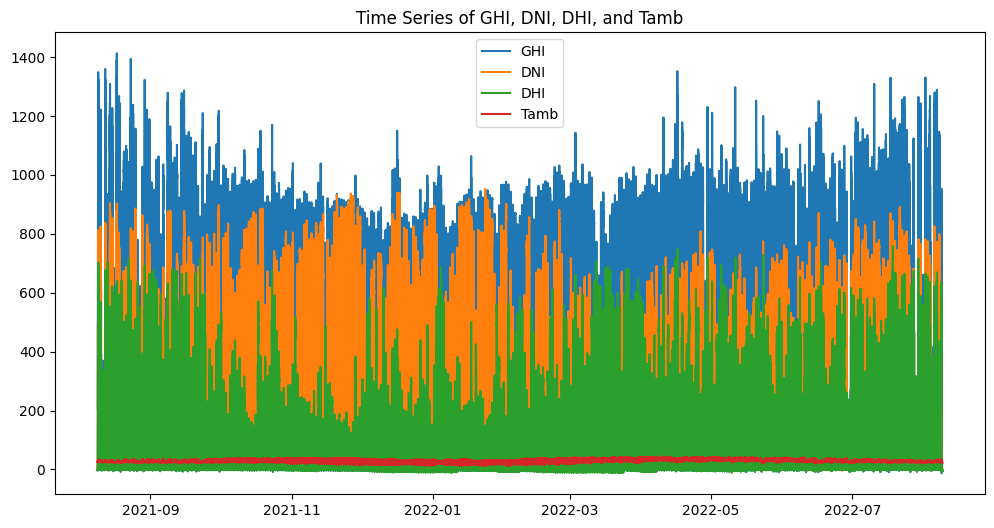

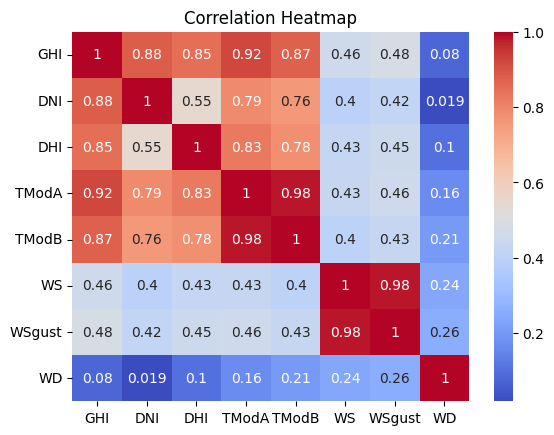

C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


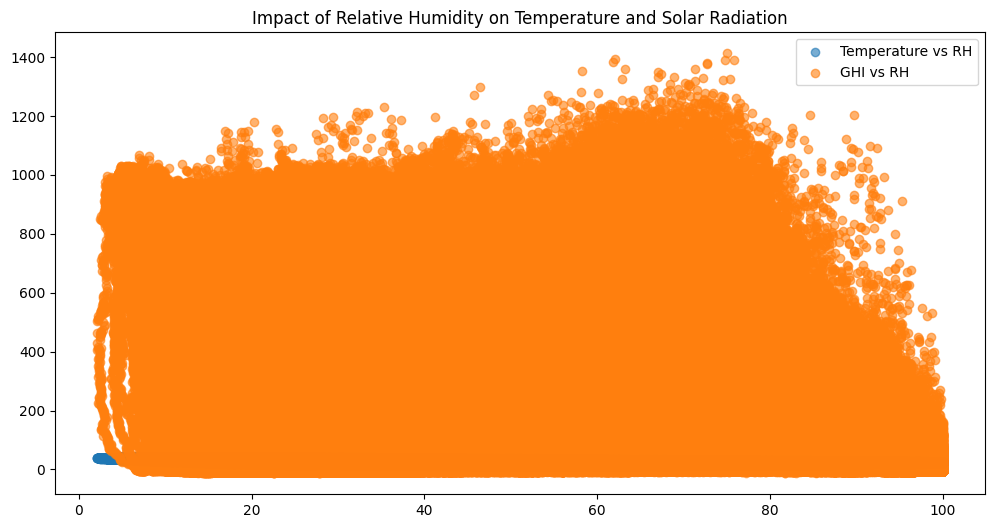

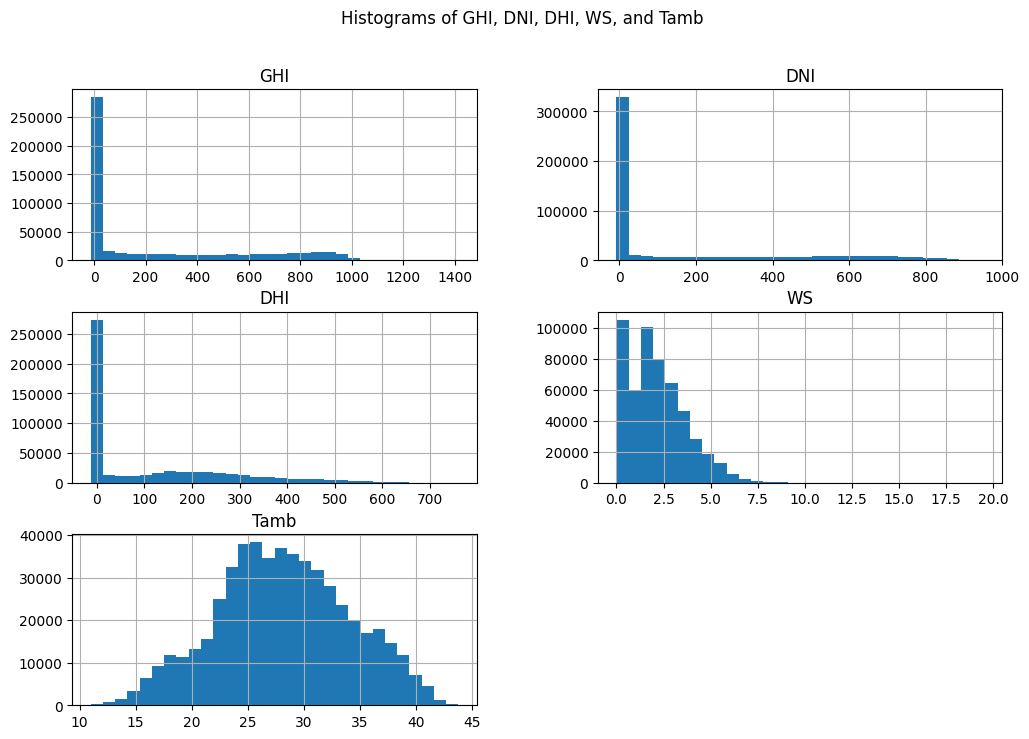

C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


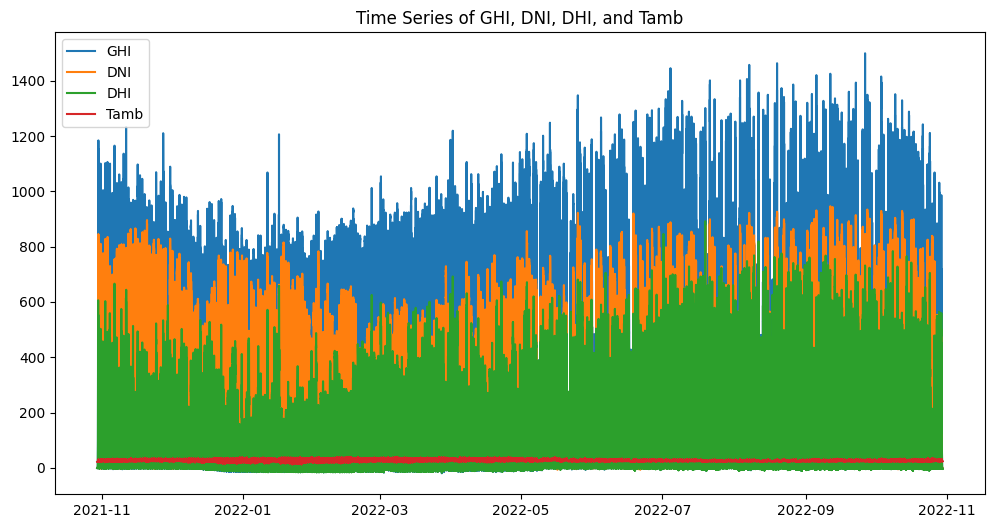

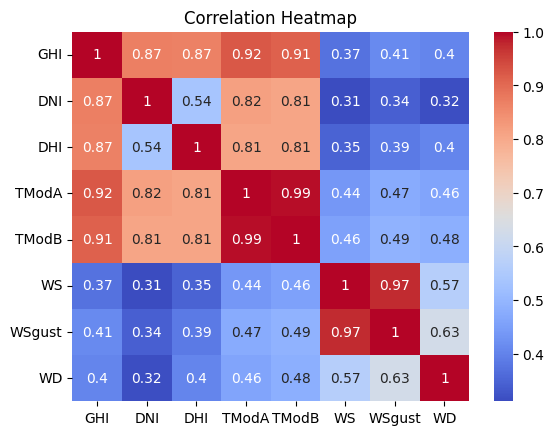

C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


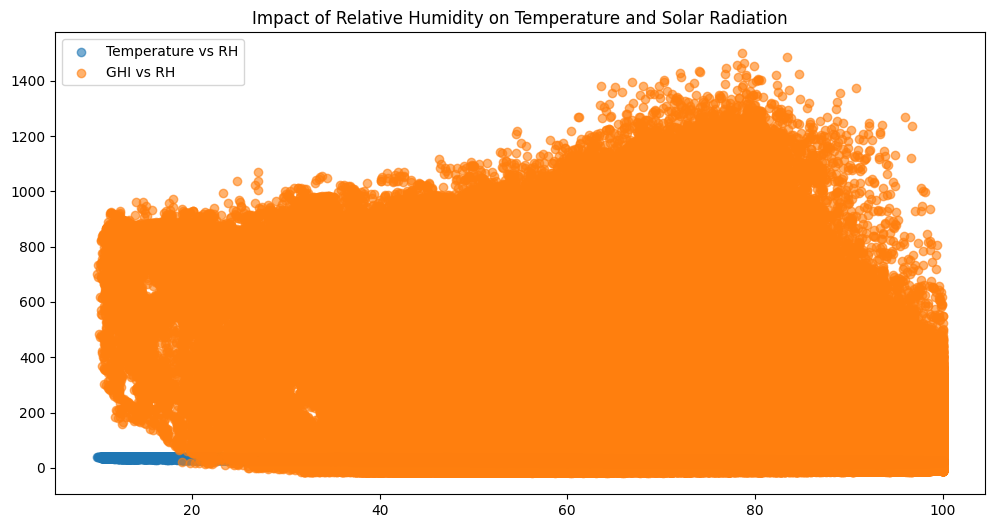

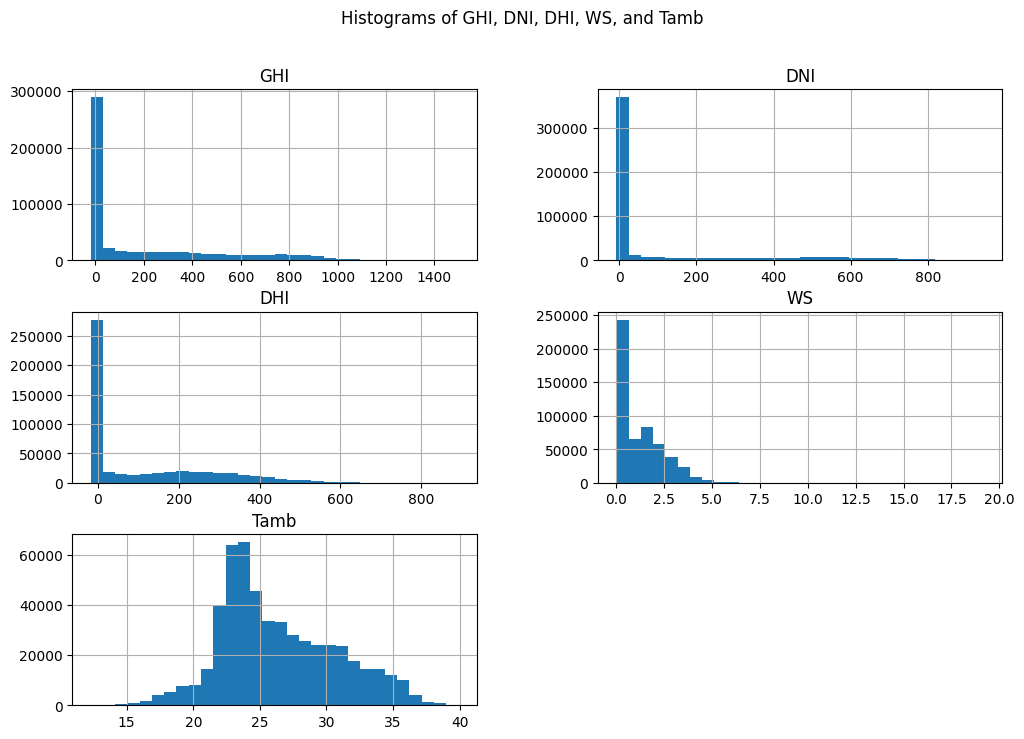

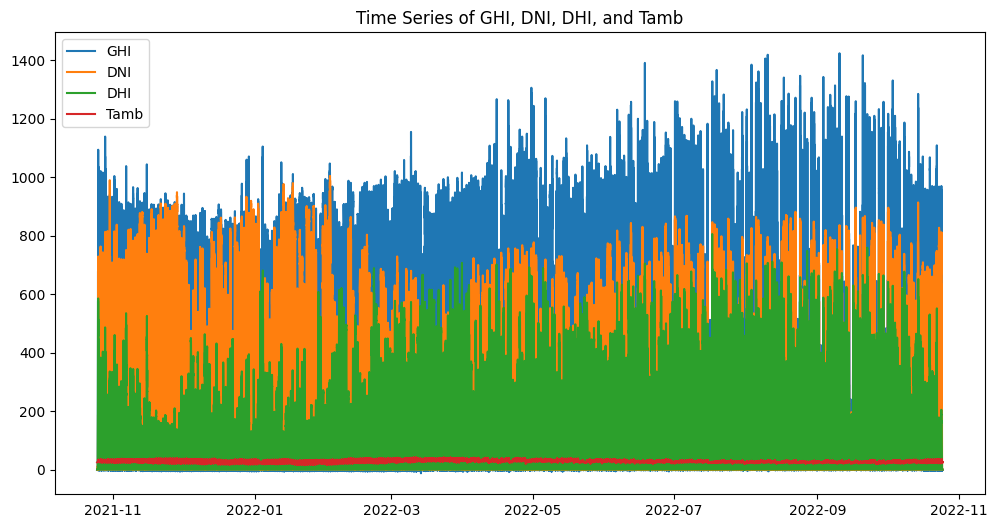

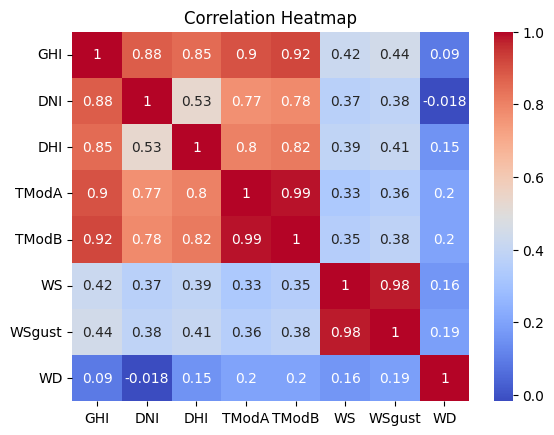

C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


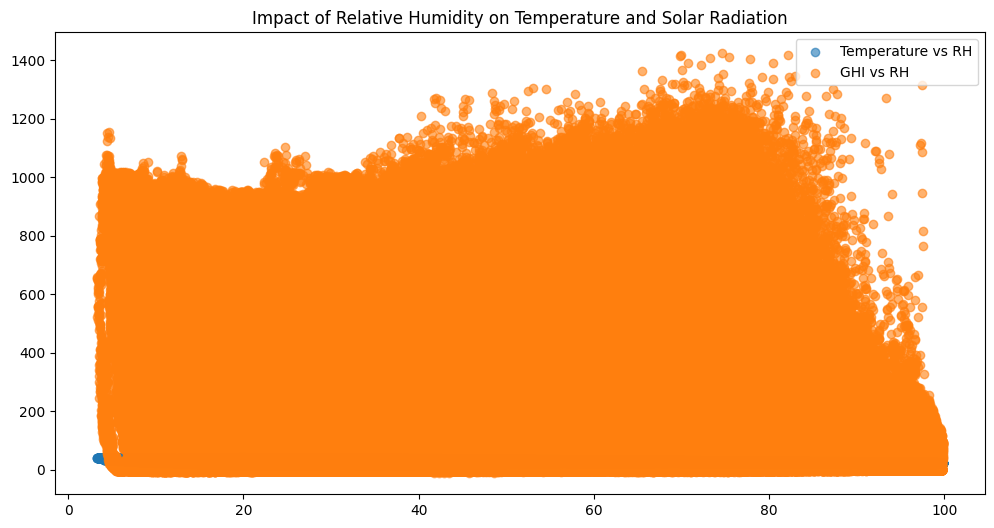

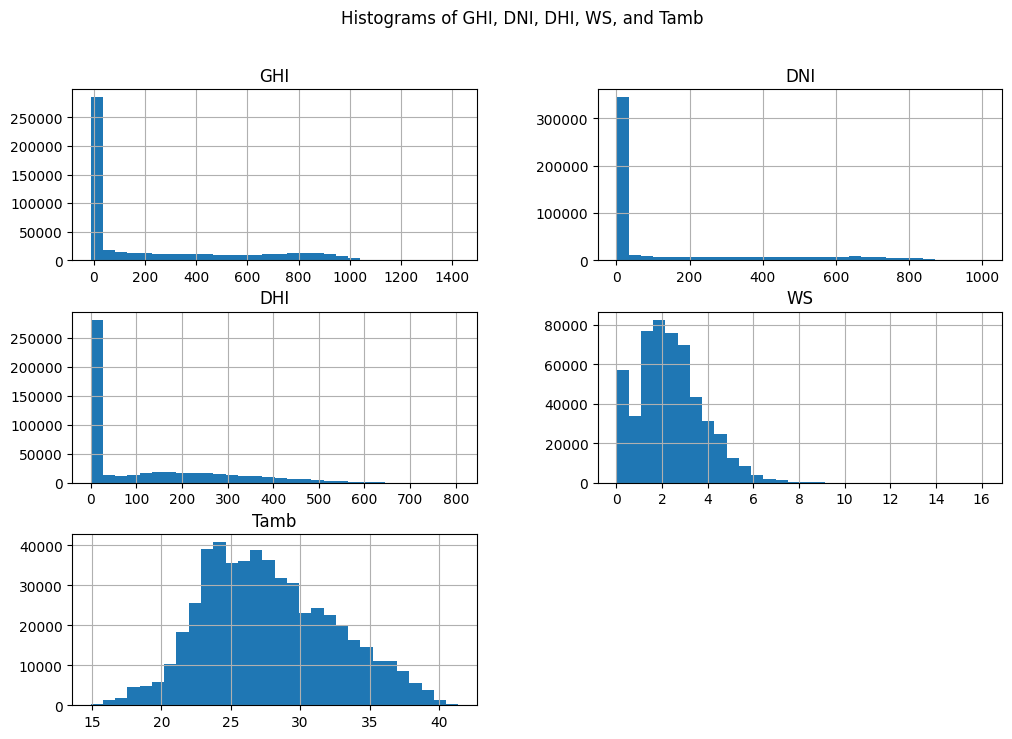

In [6]:
if benin_data is not None:
    eda(benin_data)
if sierraleone_data is not None:
    eda(sierraleone_data)
if togo_data is not None:
    eda(togo_data)